In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL.Image import *
from matplotlib import cm
from PIL import Image
import cv2

In [126]:
"""defect detection"""

def detect(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    #img = cv2.medianBlur(img,5) #blur  to make the transition smooth from color to color
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h = hsv[:, :, 0] #hue
    s = hsv[:, :, 1] #saturation
    v = hsv[:, :, 2] #value or lightness
   
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    ''' comparison'''
    
    res_defects=np.where(res != 0)
    img_comparison = np.copy(img)
    img_comparison[res_defects] = 0

    Comparison = cv2.addWeighted(img, 0.2, res, 0.8,0) 
    
    '''plot'''
    
    titles = ['Original HSV_Image', 'Result',
            'Comparison', 'Error']
    images = [img, res, Comparison, img_comparison]

    plt.figure(1, figsize=(30, 30))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
        
    plt. subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=None) 
    plt.show()
    
    return res



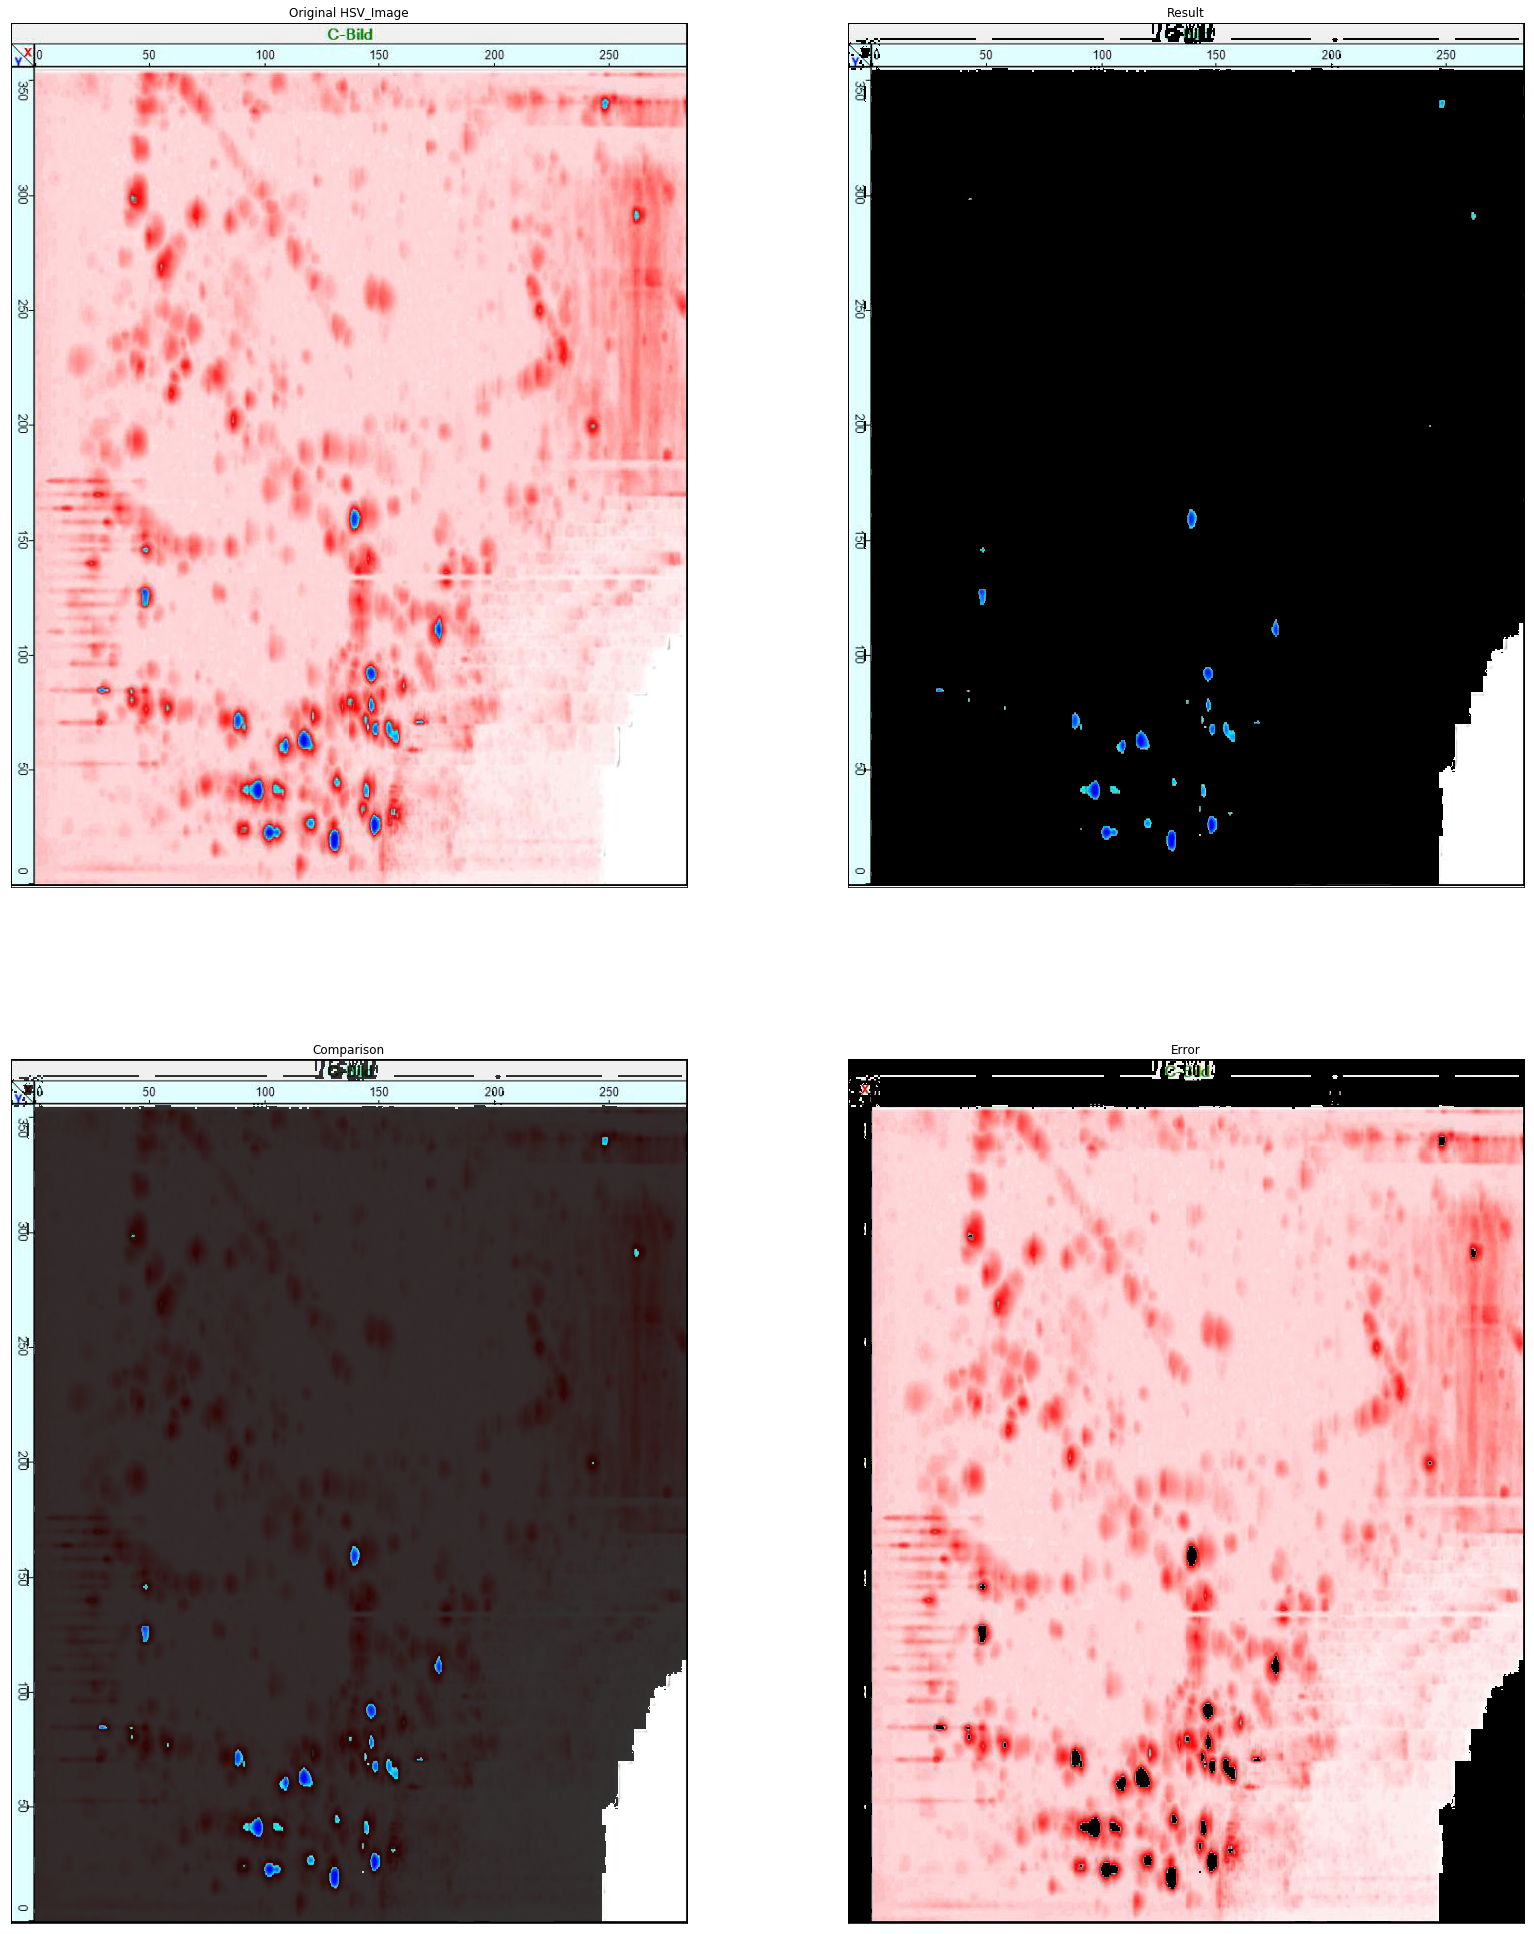

In [127]:

'''Functions call'''

#path = "H:/ali/overview_2/B-Bild-2.png"
path = "H:/ali/overview_2/Komponent1/xy.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

result = detect(path,lower_bound,upper_bound,[150,0,0],[179,255,255])


In [180]:
"""the errror"""

def error(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    ''' comparison'''
    
    res_defects=np.where(res != 0)
    img_comparison = np.copy(img)
    img_comparison[res_defects] = 0

    return img_comparison


In [181]:
"""source: https://matplotlib.org/1.3.1/mpl_toolkits/axes_grid/users/overview.html"""
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

'''zoom function'''
def zoom(img,X,Y):
    
    """plot error"""
    f, ax = plt.subplots(1, figsize=(10,6))
    ax.imshow(img)
    
    """zoom"""
    axins = zoomed_inset_axes(ax, 10, loc="center", bbox_to_anchor=(0,0))
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
    axins.set_xlim(X)
    axins.set_ylim(Y)
    
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    """Plot zoom window"""
    axins.imshow(img)
    
    plt.draw()
    plt.show()

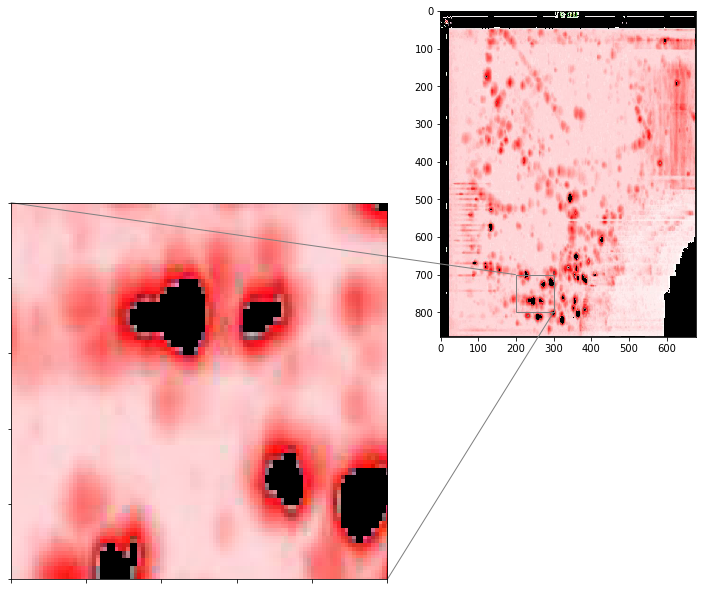

In [182]:

'''Functions call'''

#path = "H:/ali/overview_2/B-Bild-2.png"
path = "H:/ali/overview_2/Komponent1/xy.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

result = error(path,lower_bound,upper_bound,[150,0,0],[179,255,255])
zoom(result,[200,300],[700,800])


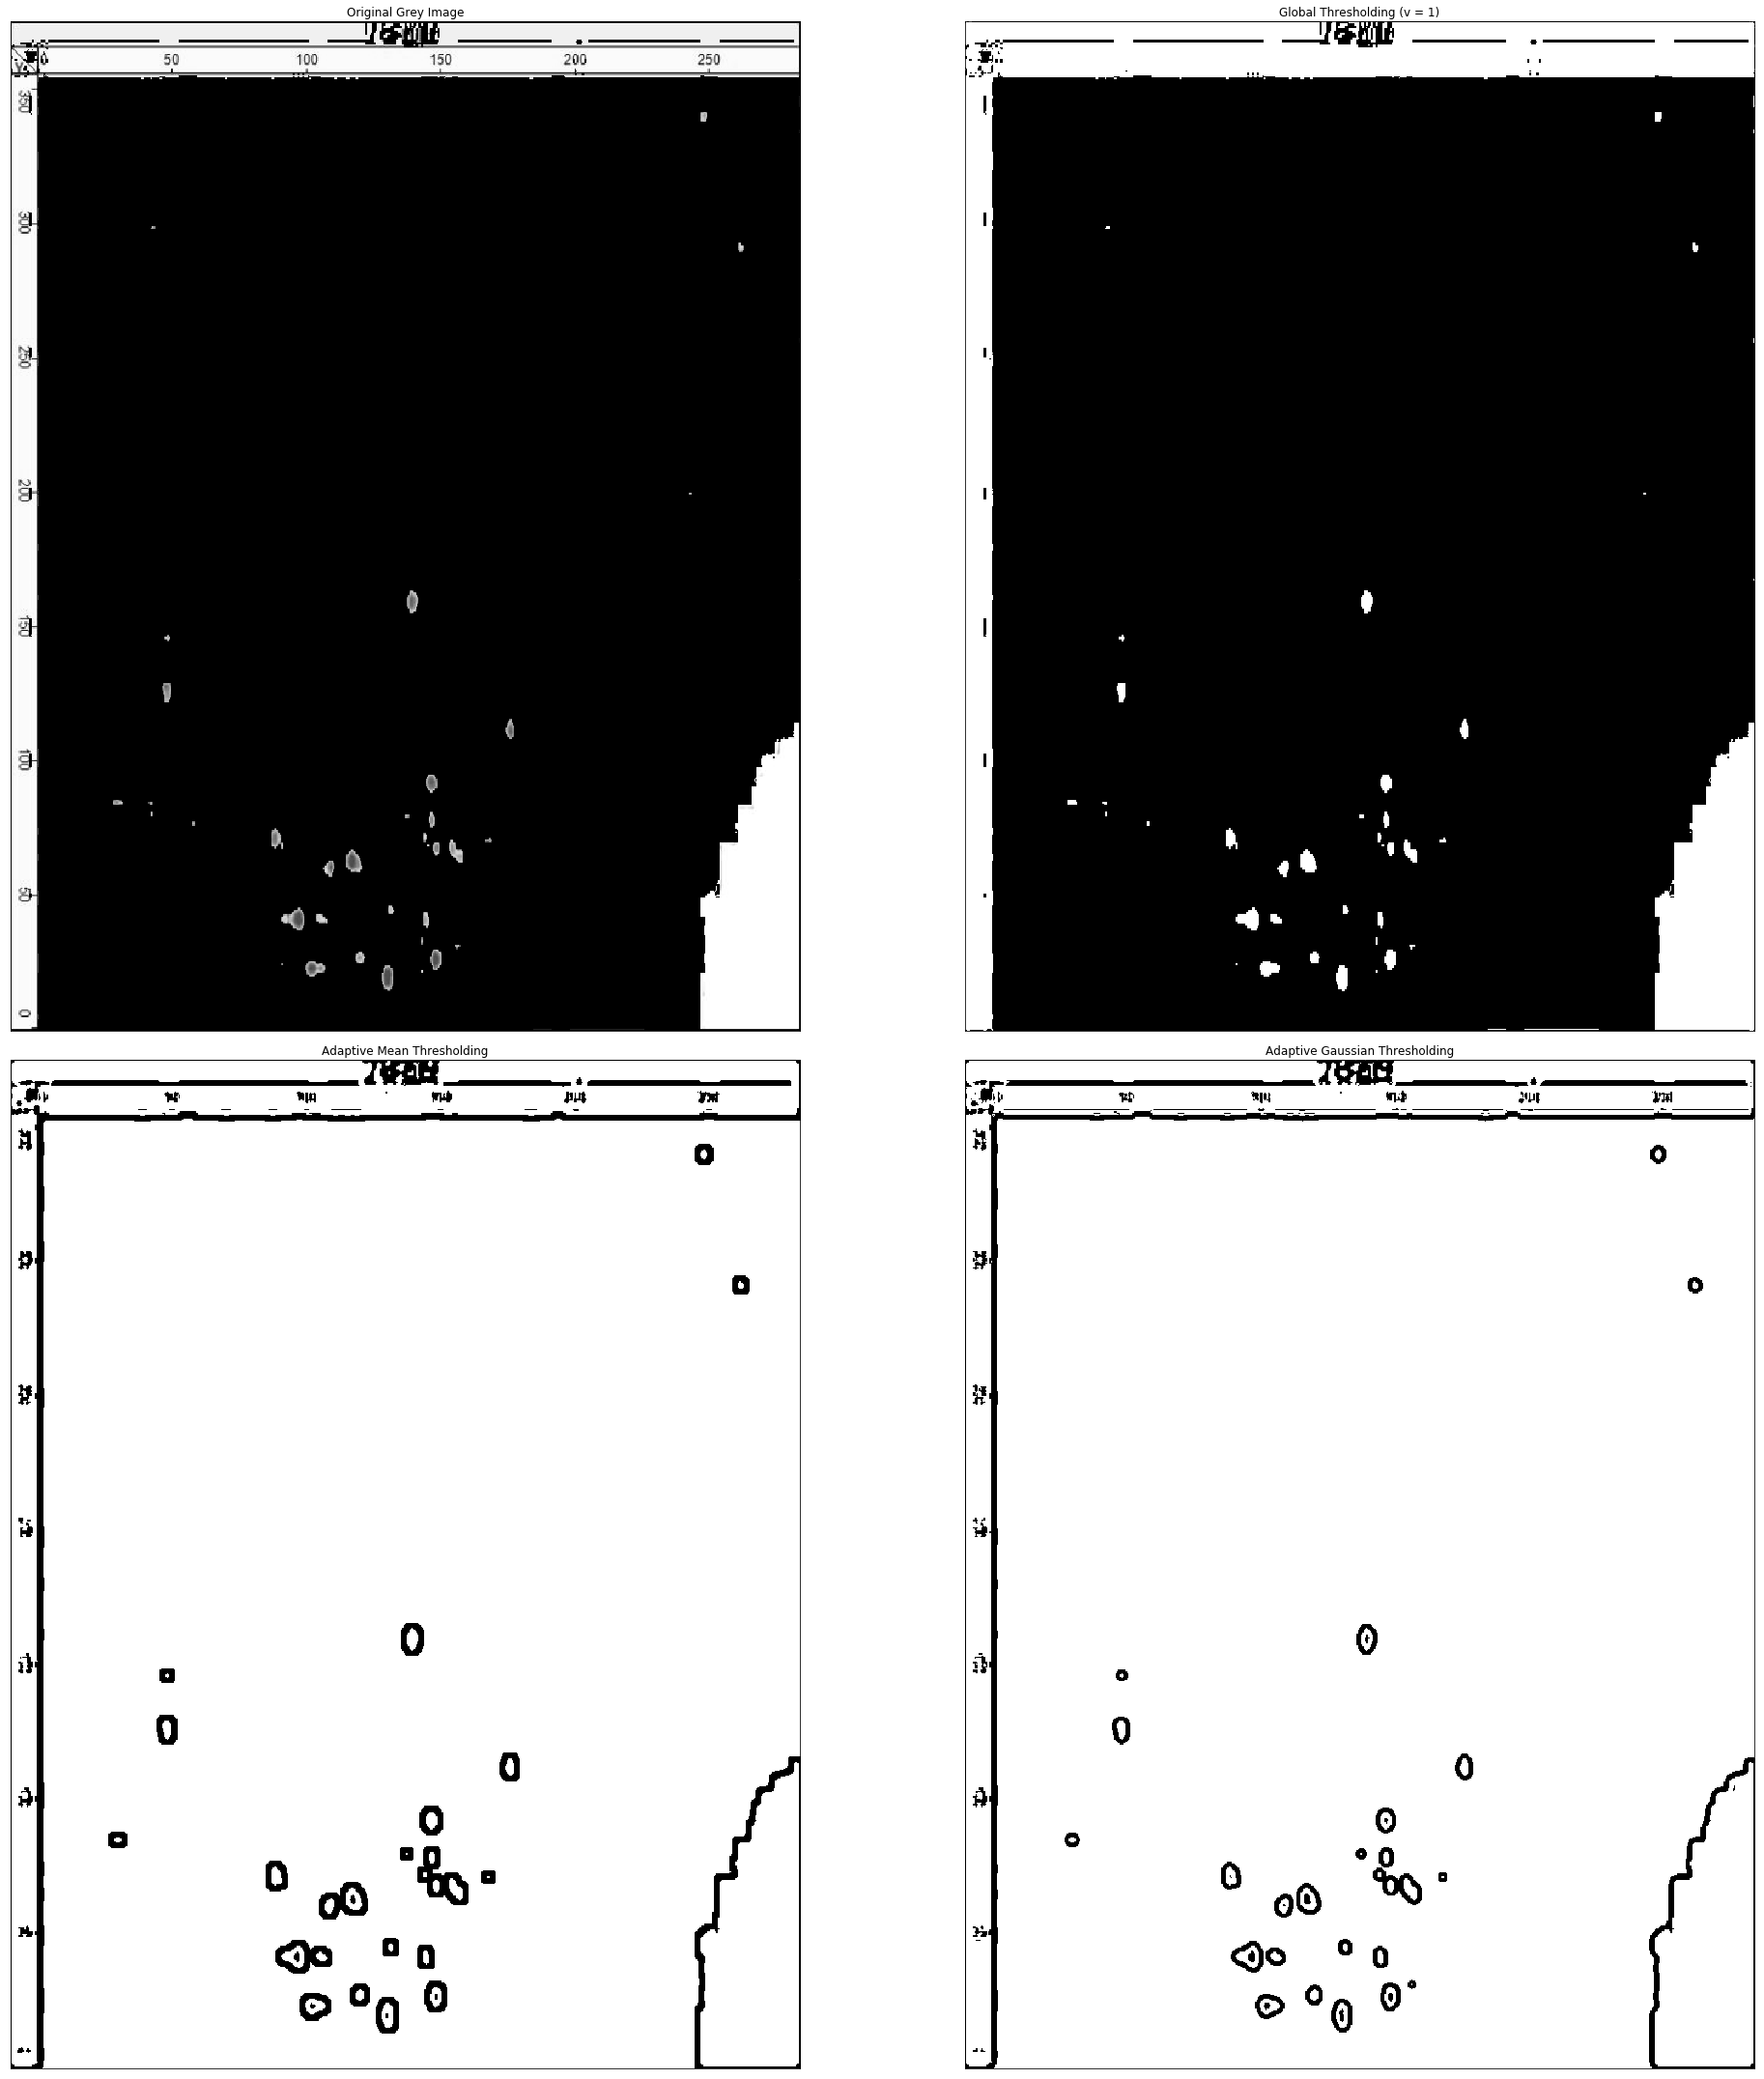

In [188]:
"""Compare different types of thresholds"""
result = detect(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY) #convert to gray
img = cv2.medianBlur(imgray,5)

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

#cv2.ADAPTIVE_THRESH_MEAN_C
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) 

#cv2.ADAPTIVE_THRESH_GAUSSIAN_C
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Grey Image', 'Global Thresholding (v = 1)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [imgray, thresh, th2, th3]

plt.figure(1, figsize=(30, 30))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


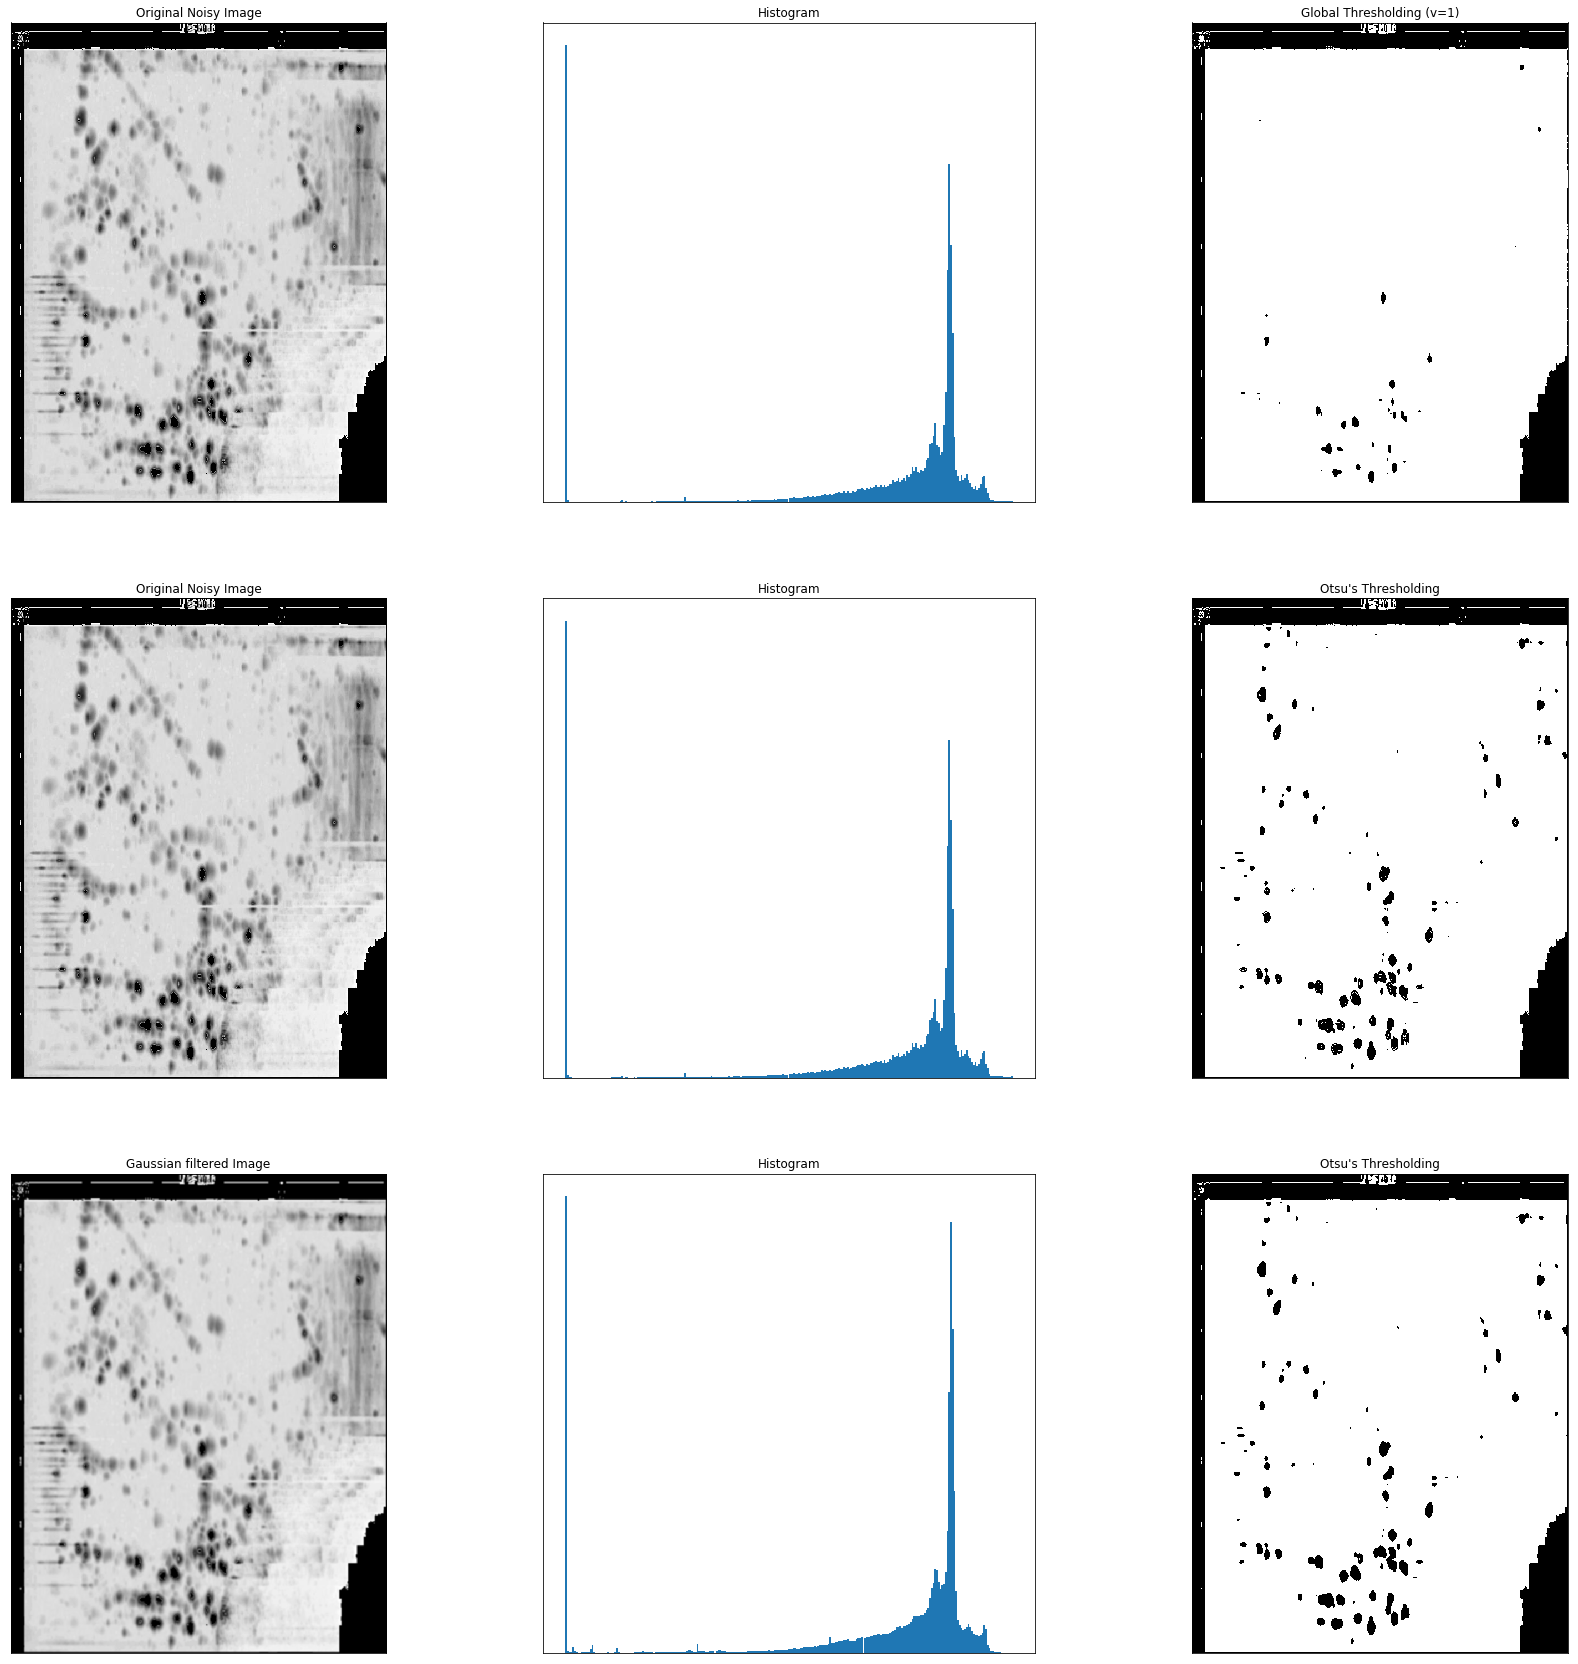

In [184]:
"""Otsu's Binarization"""

img = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY) #convert to gray

# global thresholding
ret1,th1 = cv2.threshold(img,1,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=1)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(1, figsize=(30, 30))
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


## Comments

### 1/

"The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram."

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html

### 2/

Bluring does not allow low defect to be detected so one can only use it for artifact detection.

#  Result 1 : defect detection

In [177]:

"""defect detection"""

def detect(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    #img = cv2.medianBlur(img,5) #blur  to make the transition smooth from color to color
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB for real image plot
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    return res


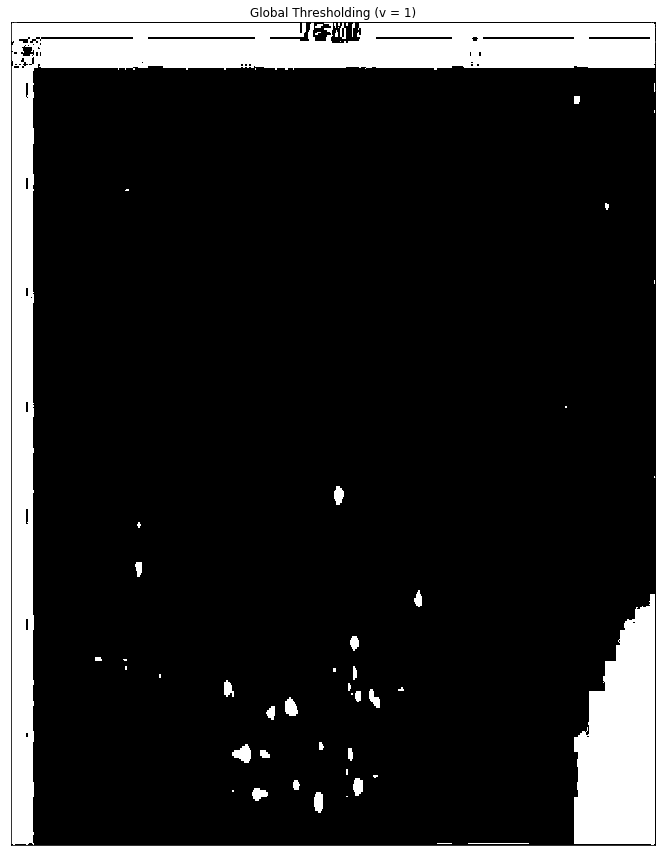

In [178]:
'''Functions call'''

#path = "H:/ali/overview_2/B-Bild-2.png"
path = "H:/ali/overview_2/Komponent1/xy.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

res = detect(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

titles = ['Global Thresholding (v = 1)']
images = [thresh]

plt.figure(1, figsize=(12, 12))
plt.imshow(images[0],'gray')
plt.title(titles[0])
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


#  Result 2 : shaped image

In [ ]:
"""https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/
py_geometric_transformations/py_geometric_transformations.html#geometric-transformations"""
find the origine
apply the algo

#  Result 3 : defects center detection